# LAB12

## 입력과 출력 shape 알아보기

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn
import pprint
pp = pprint.PrettyPrinter(indent=4)
sess = tf.InteractiveSession()

In [2]:
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

In [3]:
x_data = np.array([[h, e, l, l, o],
                       [e, o, l, l, l],
                       [l, l, e, e, l]], dtype=np.float32)
pp.pprint(x_data)
    
cell = rnn.BasicLSTMCell(num_units=2, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell, x_data, 
                                              dtype=tf.float32)
sess.run(tf.global_variables_initializer())
pp.pprint(outputs.eval())

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
array([[[-0.11198516, -0.06981583],
        [-0.01917916, -0.04727198],
        [-0.08855368,  0.08850942],
        [-0.13179909

## Hi Hello RNN

In [5]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

In [2]:
idx2char = ['h', 'i', 'e', 'l', 'o']

In [3]:
x_data = [[0, 1, 0, 2, 3, 3]]   # hihell
x_one_hot = [[[1, 0, 0, 0, 0],   # h 0
              [0, 1, 0, 0, 0],   # i 1
              [1, 0, 0, 0, 0],   # h 0
              [0, 0, 1, 0, 0],   # e 2
              [0, 0, 0, 1, 0],   # l 3
              [0, 0, 0, 1, 0]]]  # l 3

y_data = [[1, 0, 2, 3, 3, 4]]    # ihello

In [4]:
num_classes = 5
input_dim = 5  # one-hot size
hidden_size = 5  # output from the LSTM. 5 to directly predict one-hot
batch_size = 1   # one sentence
sequence_length = 6  # |ihello| == 6
learning_rate = 0.1

In [7]:
tf.reset_default_graph() # graph reset(중복 호출 문제 해결)

X = tf.placeholder(
    tf.float32, [None, sequence_length, input_dim])  # X one-hot
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

# RNN model (LSTM)
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(
    cell, X, initial_state=initial_state, dtype=tf.float32)

In [8]:
# Fully connected layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size]) 

# fc_w = tf.get_variable("fc_w", [hidden_size, num_classes])
# fc_b = tf.get_variable("fc_b", [num_classes])
# outputs = tf.matmul(X_for_fc, fc_w) + fc_b
outputs = tf.contrib.layers.fully_connected(
    inputs=X_for_fc, num_outputs=num_classes, activation_fn=None) # RNN의 output과 shape 같음

In [9]:
# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length]) # weights 초기화

sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights) # Cost: sequence_loss
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [10]:
prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_one_hot, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_one_hot})
        print(i, "loss:", l, "prediction: ", result, "true Y: ", y_data)

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print("\tPrediction str: ", ''.join(result_str))

0 loss: 1.6103808 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
1 loss: 1.5202656 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
2 loss: 1.4347726 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
3 loss: 1.3474722 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
4 loss: 1.2594104 prediction:  [[2 3 2 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  elelll
5 loss: 1.1594619 prediction:  [[2 3 2 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  elelll
6 loss: 1.0369692 prediction:  [[2 2 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  eeello
7 loss: 0.9091644 prediction:  [[2 2 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  eeello
8 loss: 0.7979161 prediction:  [[2 2 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  eeello
9 loss: 0.7062195 prediction:  [[2 2 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Pred

## Character Sequence RNN

In [1]:
sample = " if you want you"
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> index

In [2]:
# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
learning_rate = 0.1

In [3]:
sample_idx = [char2idx[c] for c in sample]  # char to index

x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1) hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) hello: ello

In [6]:
X = tf.placeholder(tf.int32, [None, sequence_length])  # X data
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

x_one_hot = tf.one_hot(X, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0

# RNN model (LSTM)
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(
    cell, x_one_hot, initial_state=initial_state, dtype=tf.float32)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# Fully connected layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes, activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [8]:
prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]

        print(i, "loss:", l, "Prediction:", ''.join(result_str))

0 loss: 2.2939882 Prediction: y  yyu yy yyyyy
1 loss: 2.1019704 Prediction: y  you       ou
2 loss: 1.8789543 Prediction: y  you       ou
3 loss: 1.5978893 Prediction: yy you  nnt you
4 loss: 1.3353235 Prediction: yy you want you
5 loss: 1.0749223 Prediction: yy you want you
6 loss: 0.8291675 Prediction: y  you want you
7 loss: 0.60954636 Prediction: yf you want you
8 loss: 0.45007405 Prediction: yf you want you
9 loss: 0.3209334 Prediction: if you want you
10 loss: 0.23298272 Prediction: if you want you
11 loss: 0.17106554 Prediction: if you want you
12 loss: 0.1233669 Prediction: if you want you
13 loss: 0.08702838 Prediction: if you want you
14 loss: 0.061155353 Prediction: if you want you
15 loss: 0.043499183 Prediction: if you want you
16 loss: 0.031540193 Prediction: if you want you
17 loss: 0.023318183 Prediction: if you want you
18 loss: 0.017510744 Prediction: if you want you
19 loss: 0.013340963 Prediction: if you want you
20 loss: 0.010345965 Prediction: if you want you
21 l

## RNN with long sequences

In [47]:
from tensorflow.contrib import rnn

In [69]:
sentence = ("if you want to build a ship, don't drum up people together to "
           "collect wood and don't assign them tasks and work, but rather "
           "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

In [84]:
data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

In [85]:
dataX = []
dataY = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    y = [char_dic[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [86]:
tf.reset_default_graph()

X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])

# One-hot encoding
X_one_hot = tf.one_hot(X, num_classes)
print(X_one_hot)  # check out the shape

Tensor("one_hot:0", shape=(?, 10, 25), dtype=float32)


In [87]:
# Make a lstm cell with hidden_size (each unit output vector size)
def lstm_cell():
    cell = rnn.BasicLSTMCell(hidden_size, state_is_tuple=True)
    return cell

multi_cells = rnn.MultiRNNCell([lstm_cell() for _ in range(2)], state_is_tuple=True)

In [88]:
# outputs: unfolding size x hidden size, state = hidden size
outputs, _states = tf.nn.dynamic_rnn(multi_cells, X_one_hot, dtype=tf.float32)

In [91]:
# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes, activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

In [92]:
# All weights are 1 (equal weights)
weights = tf.ones([batch_size, sequence_length])

sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
mean_loss = tf.reduce_mean(sequence_loss)
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mean_loss)

In [95]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(500):
    _, l, results = sess.run(
    [train_op, mean_loss, outputs], feed_dict={X: dataX, Y: dataY})
    for j, result in enumerate(results):
        index = np.argmax(result, axis=1)
        print(i, j, ''.join([char_set[t] for t in index]), l)

# Let's print the last char of each result to check it works
results = sess.run(outputs, feed_dict={X: dataX})
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:  # print all for the first result to make a sentence
        print(''.join([char_set[t] for t in index]), end='')
    else:
        print(char_set[index[-1]], end='')

0 0 soyyyyyssy 3.2187052
0 1 diiyyyyyyt 3.2187052
0 2 iiysysssst 3.2187052
0 3 gg.ssssstt 3.2187052
0 4 ..sssstttt 3.2187052
0 5 miettttttt 3.2187052
0 6 ioottttttt 3.2187052
0 7 ooottttttt 3.2187052
0 8 tttttttttt 3.2187052
0 9 imytootdsd 3.2187052
0 10 sttsstdsds 3.2187052
0 11 itottdsdss 3.2187052
0 12 sssodddsst 3.2187052
0 13 .oddddsstt 3.2187052
0 14 iiiddntttt 3.2187052
0 15 ddddnttttt 3.2187052
0 16 m.mssttttt 3.2187052
0 17 sssstttttt 3.2187052
0 18 dnttttttty 3.2187052
0 19 wtttttttyy 3.2187052
0 20 itttttyyyy 3.2187052
0 21 tttttwyyyy 3.2187052
0 22 iioooyyyyy 3.2187052
0 23 sooooyyyyw 3.2187052
0 24 oooyyyyyws 3.2187052
0 25 swyyyswsss 3.2187052
0 26 wyyywwwwww 3.2187052
0 27 yyyyysssss 3.2187052
0 28 iytwwwsssw 3.2187052
0 29 wwwwwswwws 3.2187052
0 30 ...sssssss 3.2187052
0 31 ilpsswwstt 3.2187052
0 32 sssssssttt 3.2187052
0 33 sttttttttt 3.2187052
0 34 iyyytttyyy 3.2187052
0 35 wwwnttttyy 3.2187052
0 36 innddyyyyy 3.2187052
0 37 mccdttyy'w 3.2187052
0 38 ccyyyyy'ww 3.2187

## RNN stock prediction

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt

tf.set_random_seed(777)  # reproducibility

In [2]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [3]:
# train Parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [4]:
# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

# train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [5]:
# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [6]:
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

[step: 0] loss: 166.21408081054688
[step: 1] loss: 105.05767822265625
[step: 2] loss: 59.56278991699219
[step: 3] loss: 29.218822479248047
[step: 4] loss: 14.212986946105957
[step: 5] loss: 13.826703071594238
[step: 6] loss: 22.126544952392578
[step: 7] loss: 28.972869873046875
[step: 8] loss: 29.148344039916992
[step: 9] loss: 24.057571411132812
[step: 10] loss: 17.0750789642334
[step: 11] loss: 10.876199722290039
[step: 12] loss: 6.789781093597412
[step: 13] loss: 4.991913318634033
[step: 14] loss: 4.958413600921631
[step: 15] loss: 5.900997638702393
[step: 16] loss: 7.070884704589844
[step: 17] loss: 7.916770935058594
[step: 18] loss: 8.133448600769043
[step: 19] loss: 7.646058082580566
[step: 20] loss: 6.564519882202148
[step: 21] loss: 5.126852035522461
[step: 22] loss: 3.6374003887176514
[step: 23] loss: 2.3999359607696533
[step: 24] loss: 1.6473323106765747
[step: 25] loss: 1.4777247905731201
[step: 26] loss: 1.818268060684204
[step: 27] loss: 2.442272901535034
[step: 28] loss: 

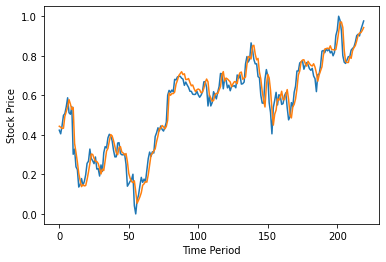

In [7]:
predict = []

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    predict.append(test_predict)
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))
    
    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()